<a href="https://colab.research.google.com/github/BorsattoAndrea/API-project/blob/main/Homework2/Andrea/Sequence_Crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.utils.vis_utils import plot_model



from sklearn.model_selection import train_test_split
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [2]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [4]:
!unzip drive/MyDrive/ANNDL2/training_dataset_homework2.zip

Archive:  drive/MyDrive/ANNDL2/training_dataset_homework2.zip
replace y_train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: y_train.npy             
  inflating: x_train.npy             


In [21]:
X = np.load("x_train.npy")
y = np.load("y_train.npy")
X.shape, y.shape

((2429, 36, 6), (2429,))

In [22]:
label_mapping={
    0: "Wish",
    1: "Another",
    2: "Comfortably",
    3: "Money",
    4: "Breathe",
    5: "Time",
    6: "Brain",
    7: "Echoes",
    8: "Wearing",
    9: "Sorrow",
    10: "Hey",
    11: "Shine"

}

In [23]:
X_nine = X[y == 3]
X_nine.shape

(381, 36, 6)

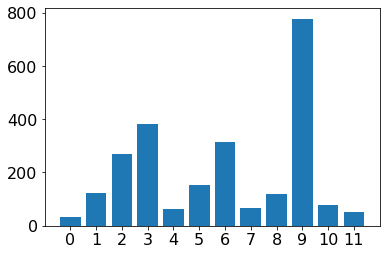

Counter({9: 777, 3: 381, 6: 313, 2: 270, 5: 153, 1: 123, 8: 120, 10: 77, 7: 68, 4: 62, 11: 51, 0: 34})


In [24]:
from collections import Counter
counter = Counter(y)
plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.show()
print(counter)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/10, random_state=seed)
 #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=seed) #1/9 * 9/10 = 1/10

In [26]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight(class_weight="balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {i : class_weights[i] for i in range(12)}
class_weights

{0: 5.52020202020202,
 1: 1.597953216374269,
 2: 0.7686357243319268,
 3: 0.5357843137254902,
 4: 3.195906432748538,
 5: 1.2392290249433107,
 6: 0.6552757793764988,
 7: 2.9863387978142075,
 8: 1.7024922118380061,
 9: 0.2602380952380952,
 10: 2.640096618357488,
 11: 4.236434108527132}

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2186, 36, 6), (243, 36, 6), (2186,), (243,))

Test for SMOTE

In [28]:
orig_shape = X_train.shape
print(orig_shape)

new_train = np.reshape(X_train, (X_train.shape[0] * X_train.shape[1], X_train.shape[2]))
print(new_train.shape)

new_y_train = []
for i in range(len(y_train)):
    # print(y_train[i])
    new_y_train.extend([y_train[i]] * X_train.shape[1])

y_train = np.array(new_y_train)
print(y_train.shape)

(2186, 36, 6)
(78696, 6)
(78696,)


In [29]:
from imblearn.over_sampling import SMOTE

for label in label_mapping:
  print("Before OverSampling, counts of label '{}': {}".format(label, sum(y_train == label)))

sm = SMOTE(random_state = seed)
X_train_res, y_train_res = sm.fit_resample(new_train, y_train.ravel())

print('\nAfter OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

for label in label_mapping:  
  print("After OverSampling, counts of label '{}': {}".format(label, sum(y_train_res == 1)))

Before OverSampling, counts of label '0': 1188
Before OverSampling, counts of label '1': 4104
Before OverSampling, counts of label '2': 8532
Before OverSampling, counts of label '3': 12240
Before OverSampling, counts of label '4': 2052
Before OverSampling, counts of label '5': 5292
Before OverSampling, counts of label '6': 10008
Before OverSampling, counts of label '7': 2196
Before OverSampling, counts of label '8': 3852
Before OverSampling, counts of label '9': 25200
Before OverSampling, counts of label '10': 2484
Before OverSampling, counts of label '11': 1548

After OverSampling, the shape of train_X: (302400, 6)
After OverSampling, the shape of train_y: (302400,) 

After OverSampling, counts of label '0': 25200
After OverSampling, counts of label '1': 25200
After OverSampling, counts of label '2': 25200
After OverSampling, counts of label '3': 25200
After OverSampling, counts of label '4': 25200
After OverSampling, counts of label '5': 25200
After OverSampling, counts of label '6':

In [73]:
reshaped_train = np.reshape(X_train_res, (int(X_train_res.shape[0]/X_train.shape[1]), X_train.shape[1], X_train.shape[2] ))
print(reshaped_train.shape)

y_train_new = []
for i in range(int(X_train_res.shape[0]/X_train.shape[1])):
    # print(i)
    value_list = list(y_train_res.reshape(int(X_train_res.shape[0]/X_train.shape[1]), X_train.shape[1])[i])
    # print(list(set(value_list)))
    y_train_new.extend(list(set(value_list)))
    ## Check: if there is any different value in a list 
    if len(set(value_list)) != 1:
        print('\n\n********* STOP: THERE IS SOMETHING WRONG IN TRAIN ******\n\n')
y_train_new = np.array(y_train_new)
counter = Counter(y_train_new)
print(counter)

(8400, 36, 6)
Counter({7: 700, 6: 700, 9: 700, 3: 700, 2: 700, 1: 700, 10: 700, 4: 700, 11: 700, 5: 700, 8: 700, 0: 700})


In [ ]:
# Convert the sparse labels to categorical values
y_train = tfk.utils.to_categorical(y_train)
y_test = tfk.utils.to_categorical(y_test)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((2186, 36, 6), (243, 36, 6), (2186, 12), (243, 12))

In [31]:
def inspect_activity(x,y):
  data = pd. DataFrame(x, columns=['Column1', 'Column2','Column3', 'Column4','Column5', 'Column6'])
  axis = data.plot(subplots=True, figsize=(17, 9), title=label_mapping.get(y))
  for ax in axis:
      ax.legend(loc='lower right')

In [31]:
X_train.shape

(2186, 36, 6)

In [ ]:
X_train.max(axis=0).shape

(36, 6)

In [83]:
len(y_train==0)

8400

Normal
Upsampled


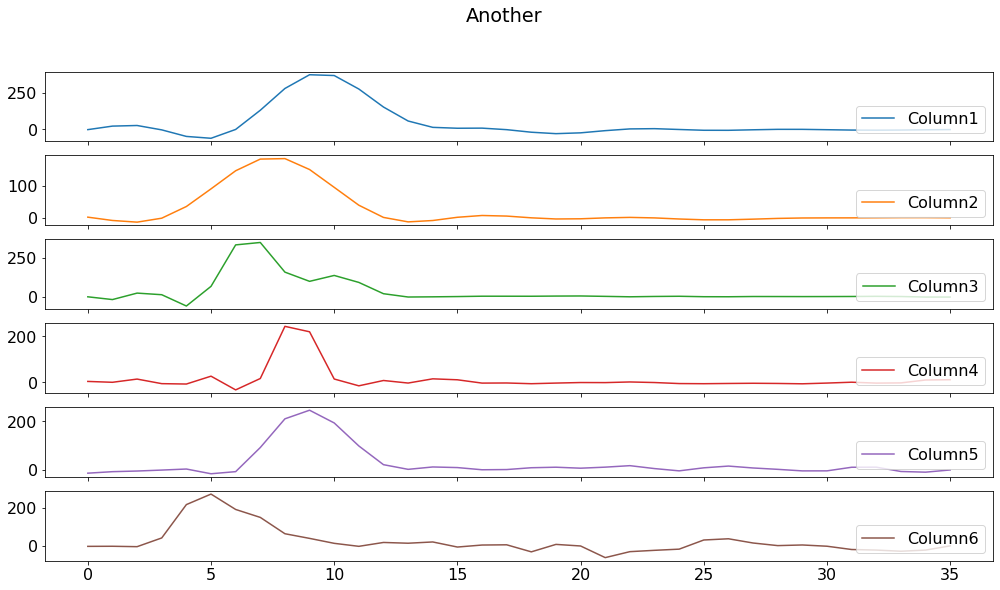

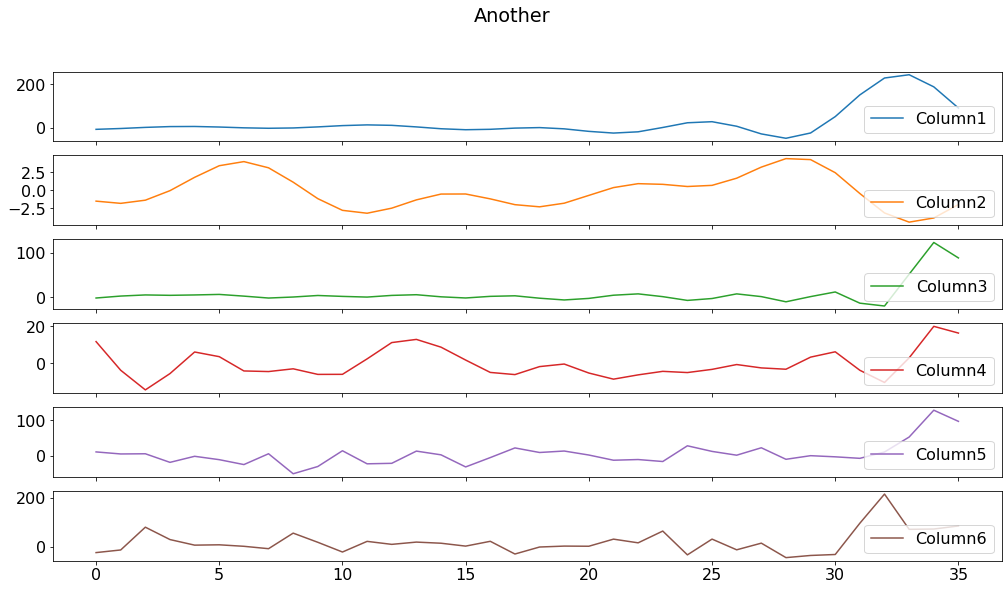

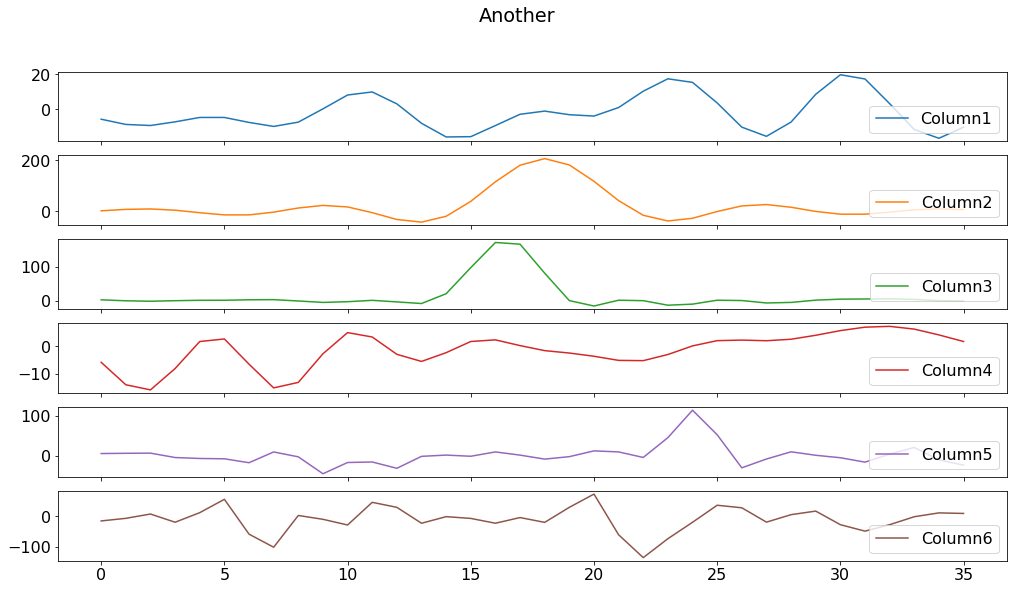

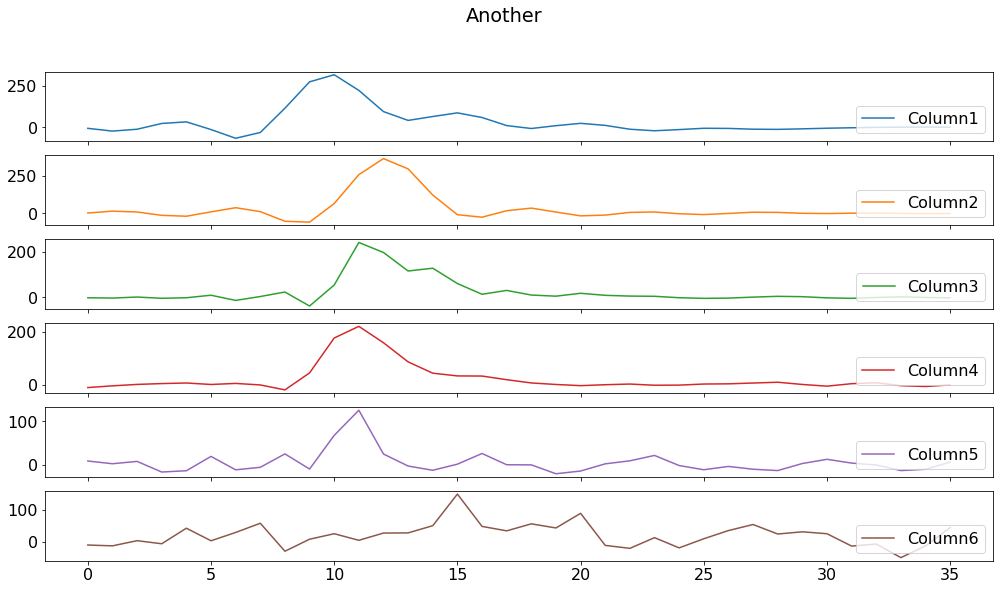

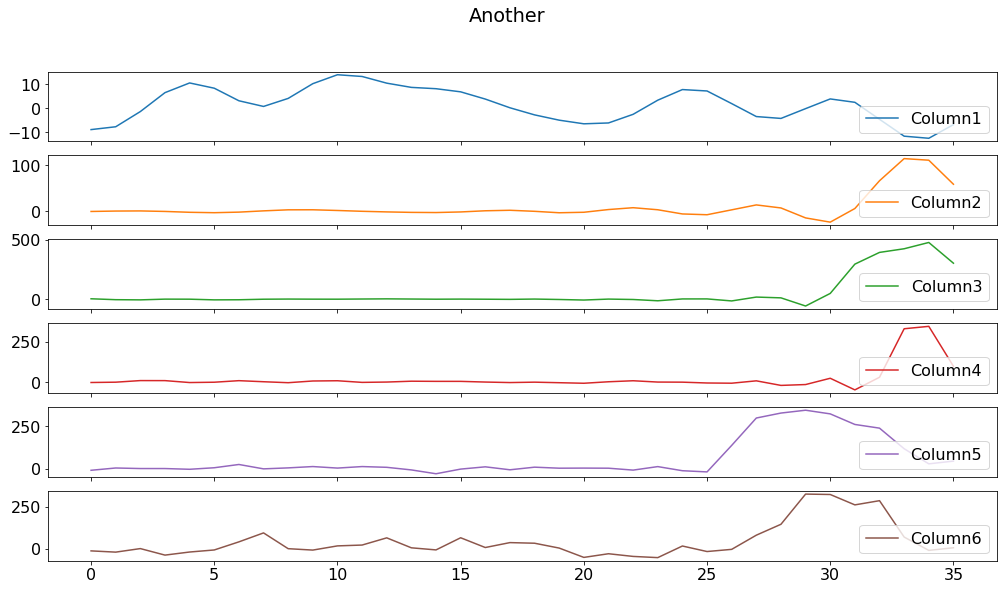

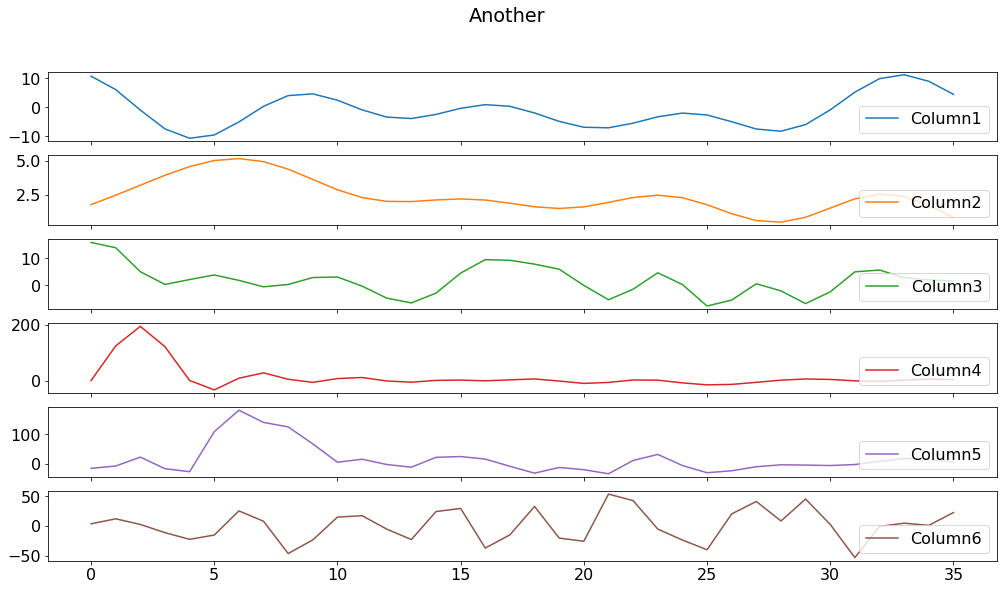

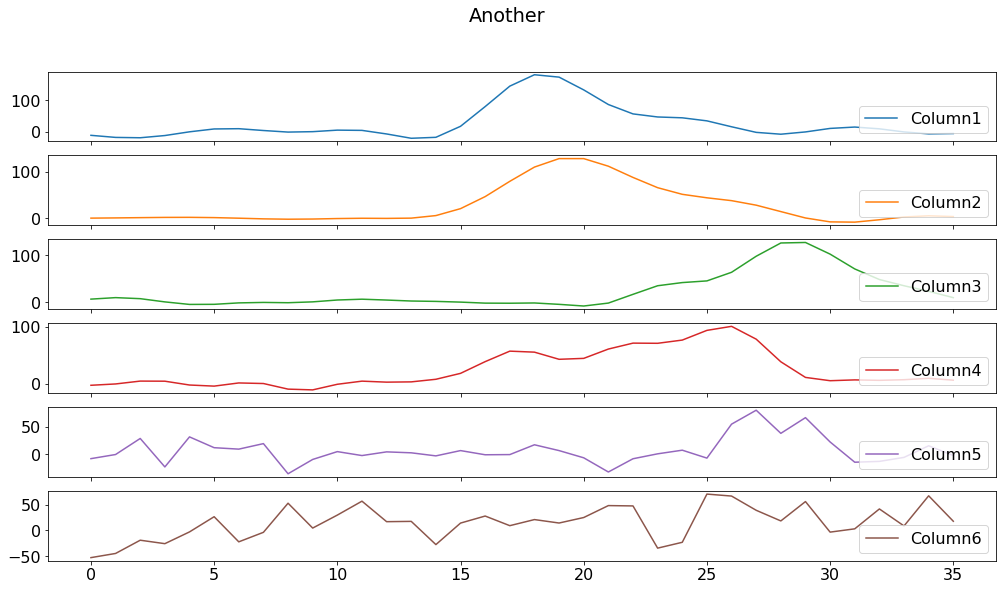

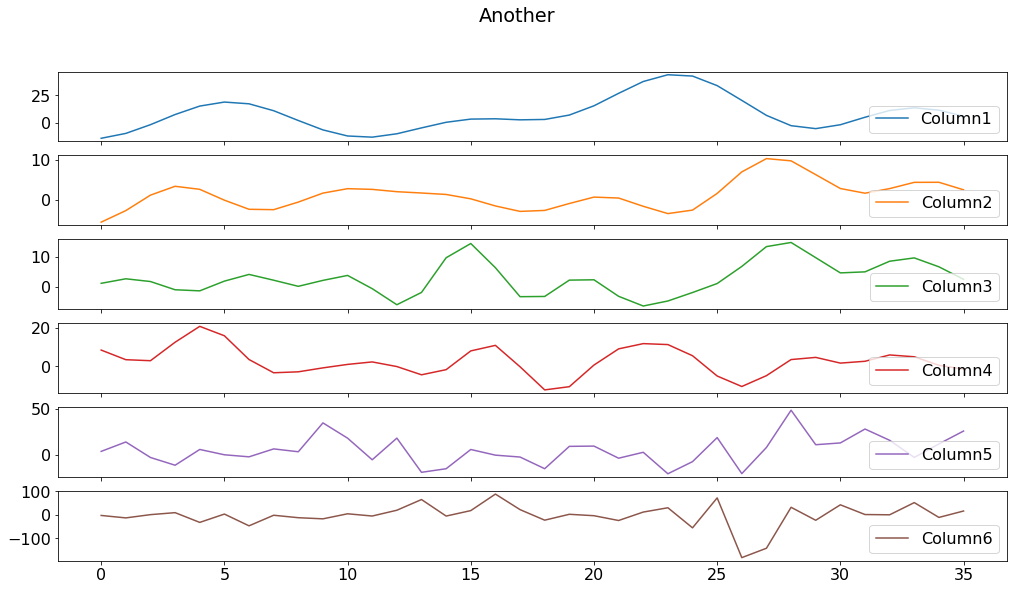

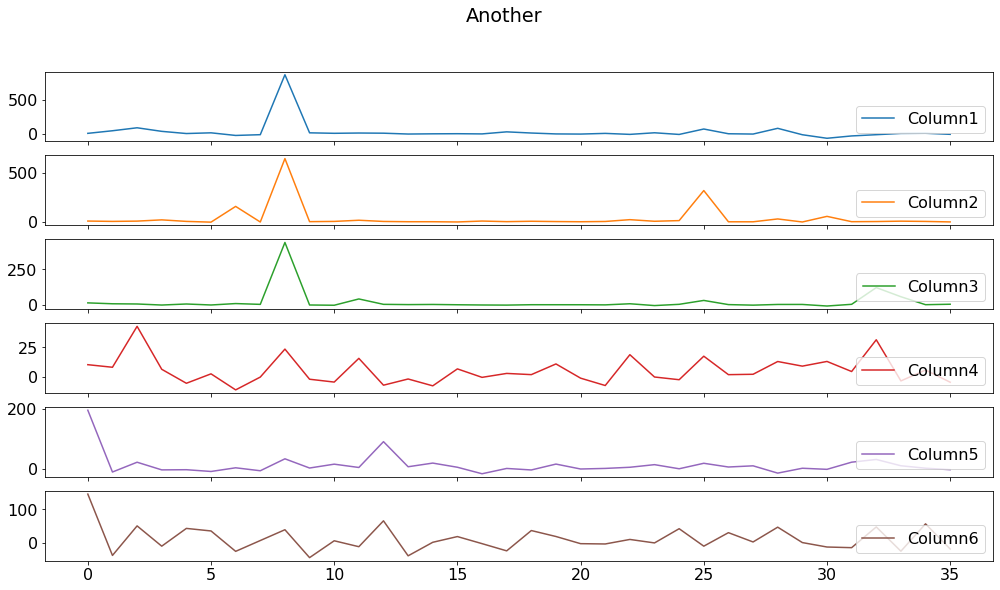

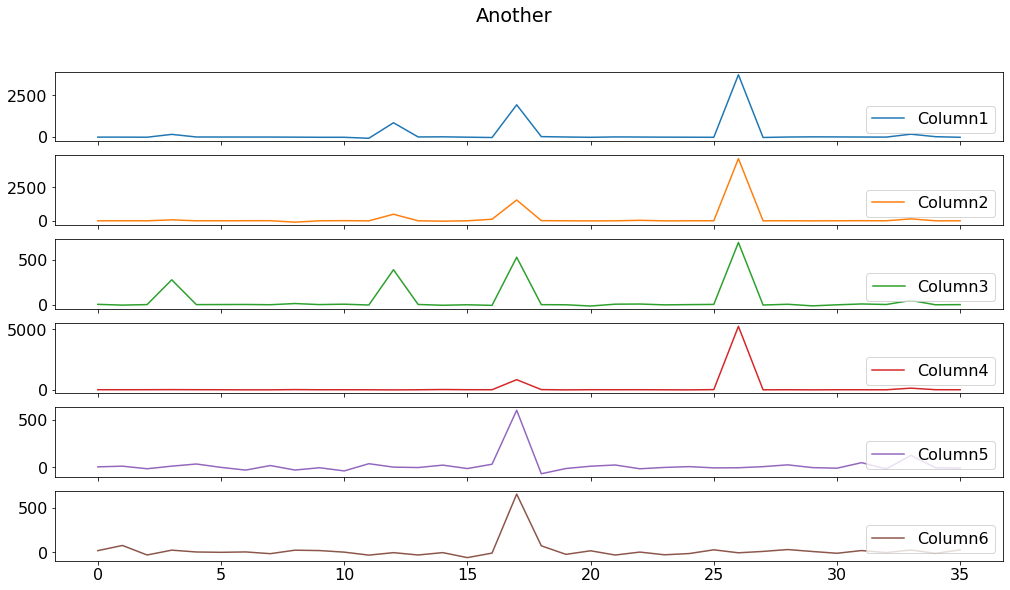

In [93]:
print("Normal")
inspect_activity(reshaped_train[y_train==1][0],y_train[y_train==1][0])
inspect_activity(reshaped_train[y_train==1][1],y_train[y_train==1][1])
inspect_activity(reshaped_train[y_train==1][3],y_train[y_train==1][3])
inspect_activity(reshaped_train[y_train==1][4],y_train[y_train==1][4])
inspect_activity(reshaped_train[y_train==1][5],y_train[y_train==1][5])
inspect_activity(reshaped_train[y_train==1][6],y_train[y_train==1][6])
inspect_activity(reshaped_train[y_train==1][7],y_train[y_train==1][7])
print("Upsampled")
inspect_activity(reshaped_train[y_train==1][100],y_train[y_train==1][100])
inspect_activity(reshaped_train[y_train==1][200],y_train[y_train==1][200])
inspect_activity(reshaped_train[y_train==1][300],y_train[y_train==1][300])




/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly cl

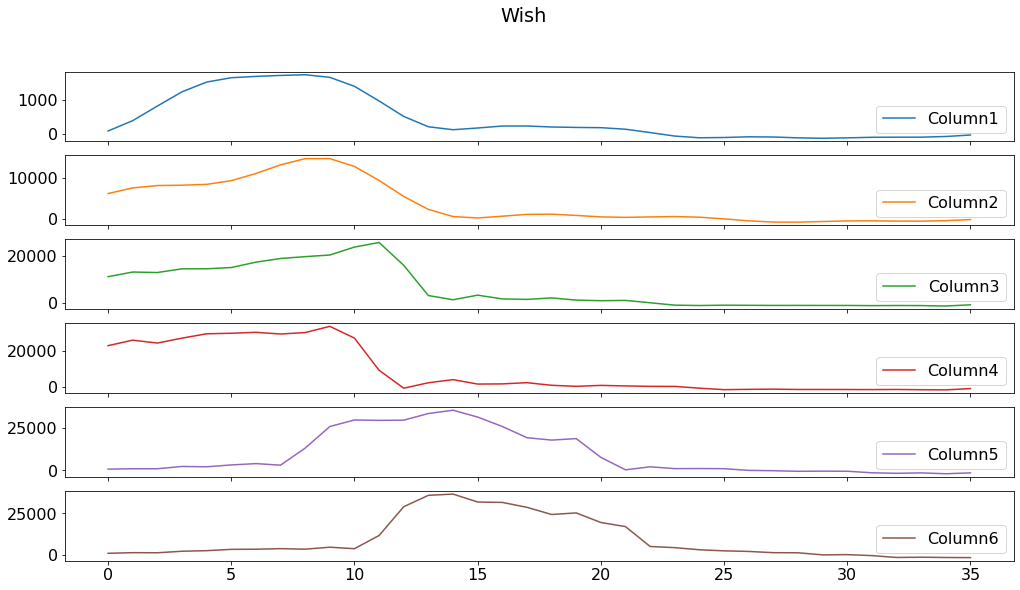

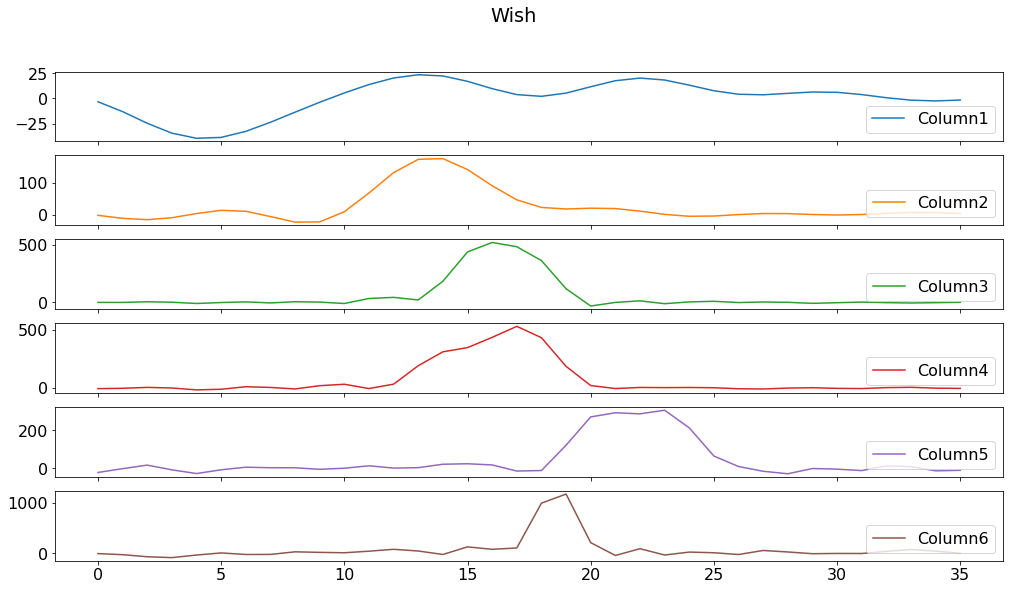

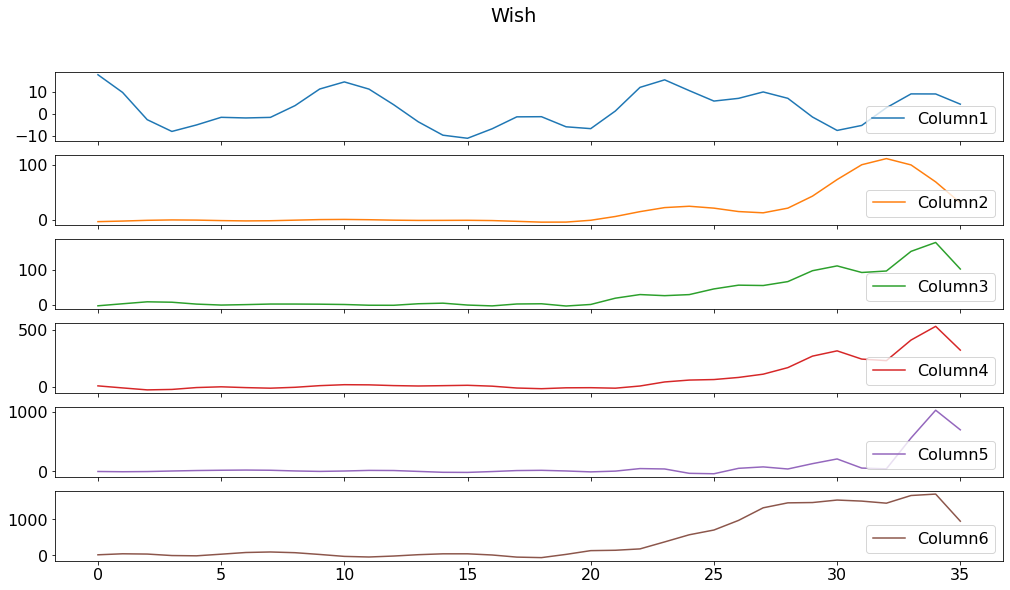

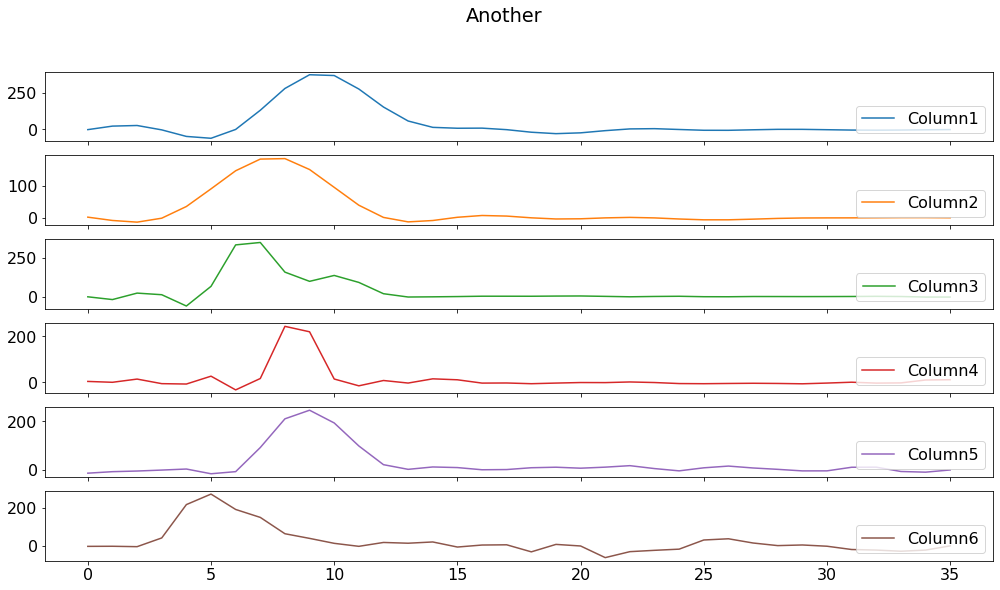

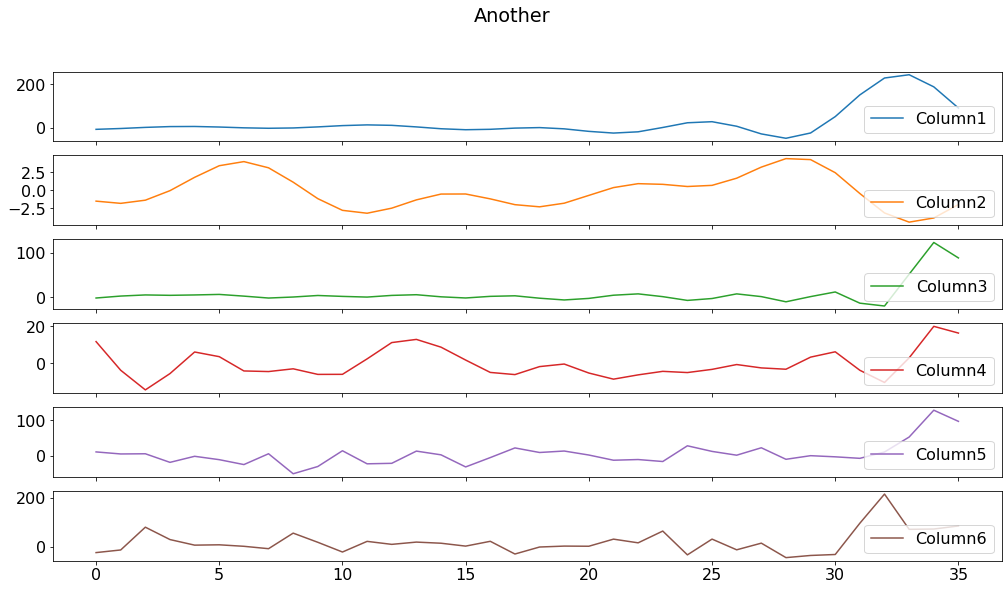

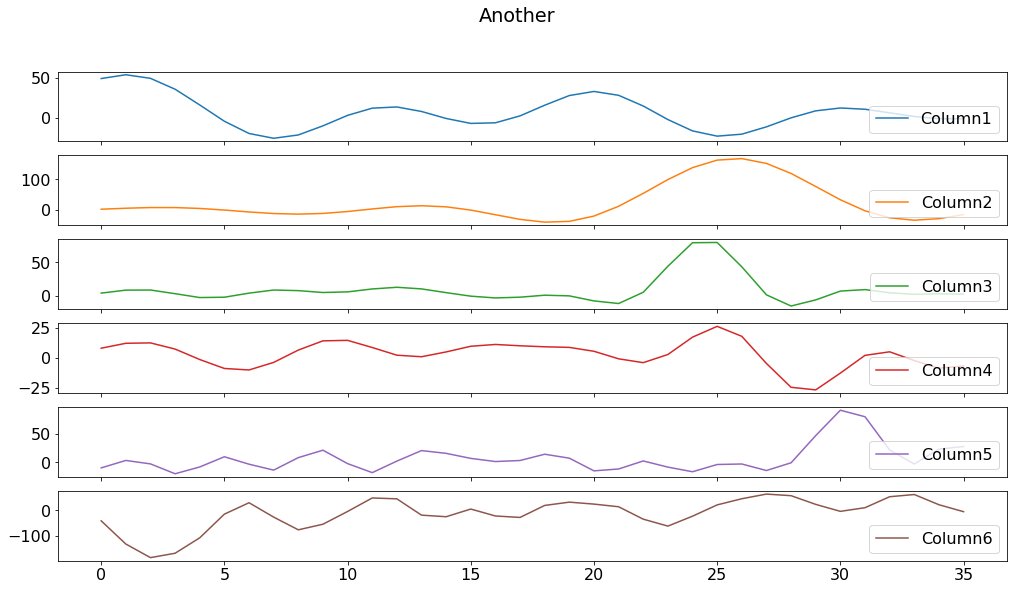

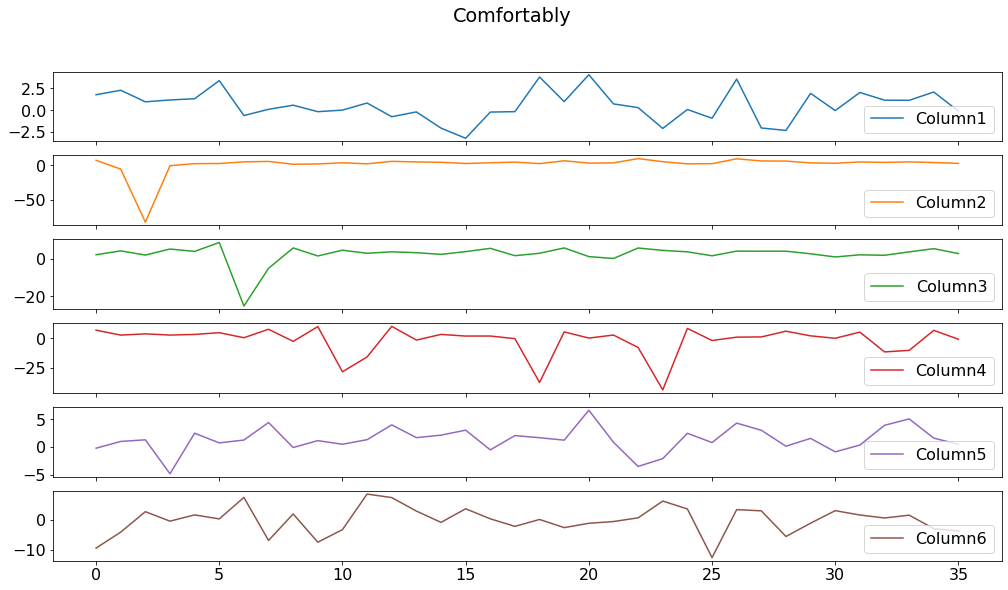

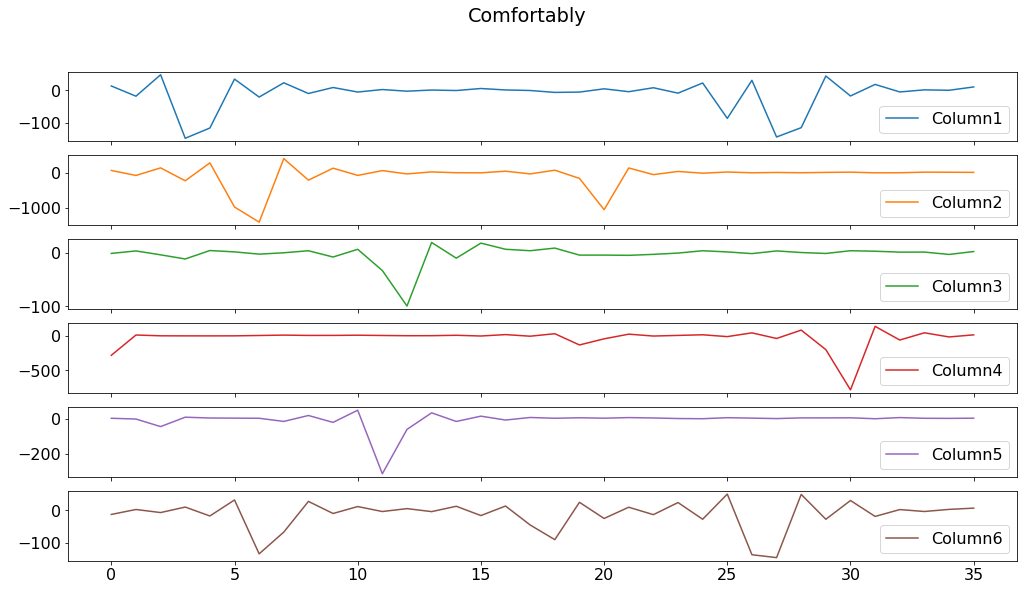

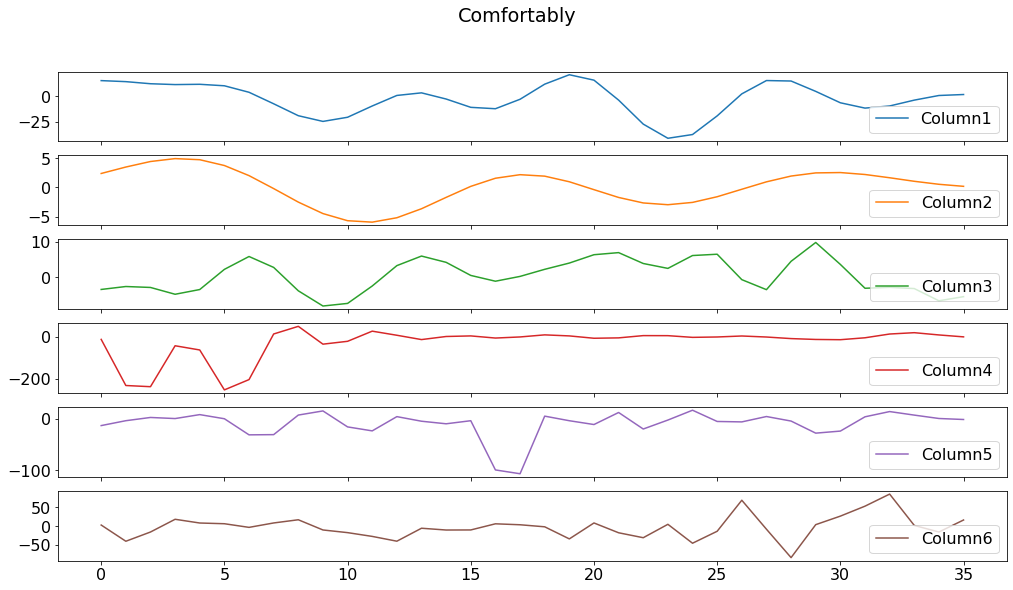

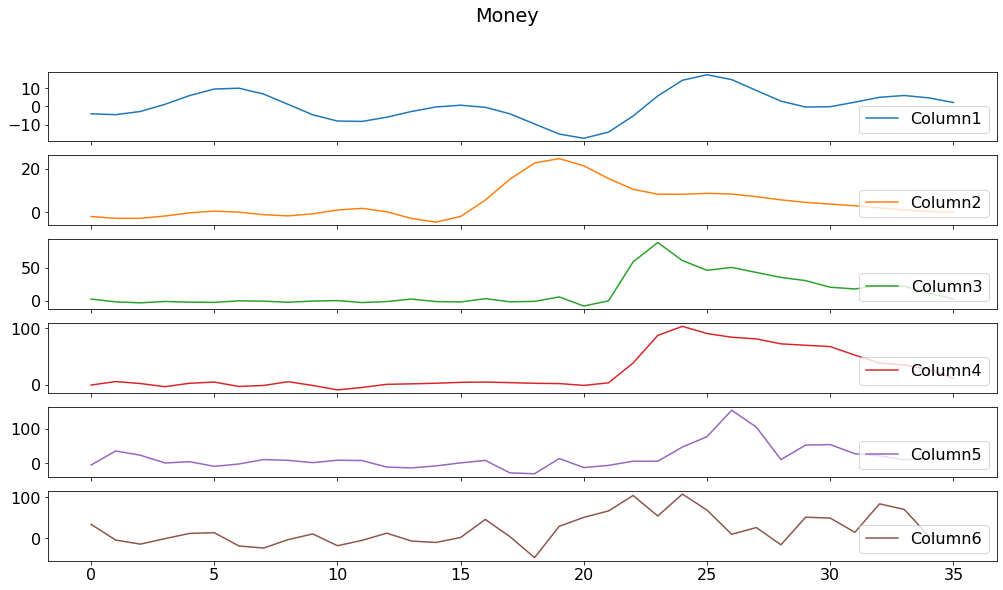

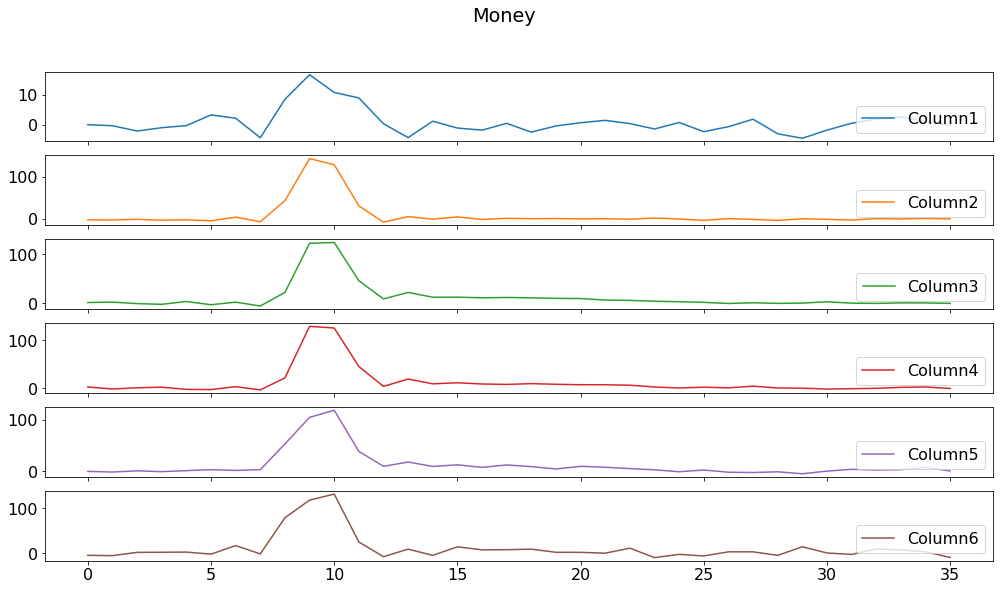

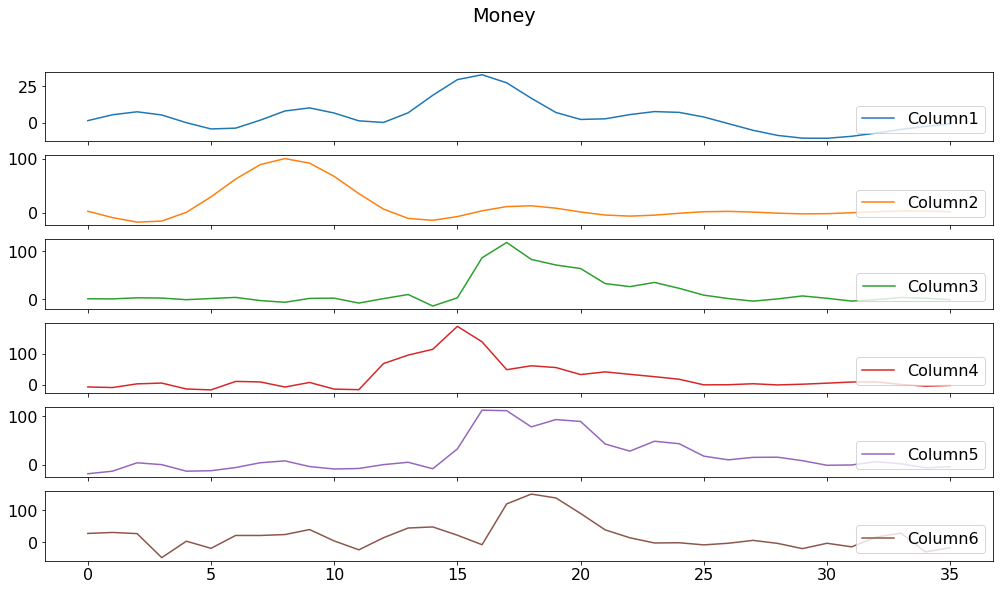

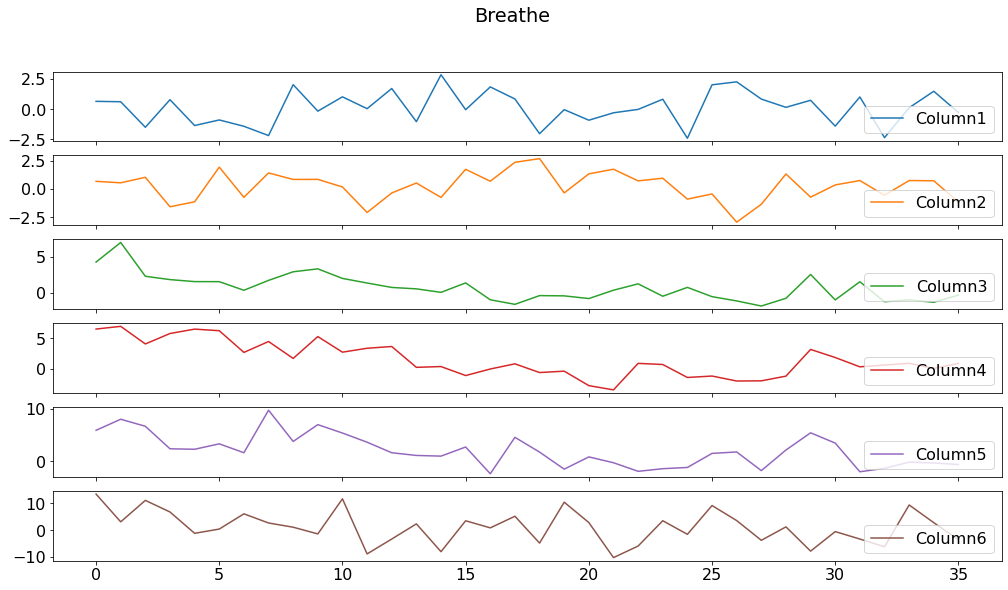

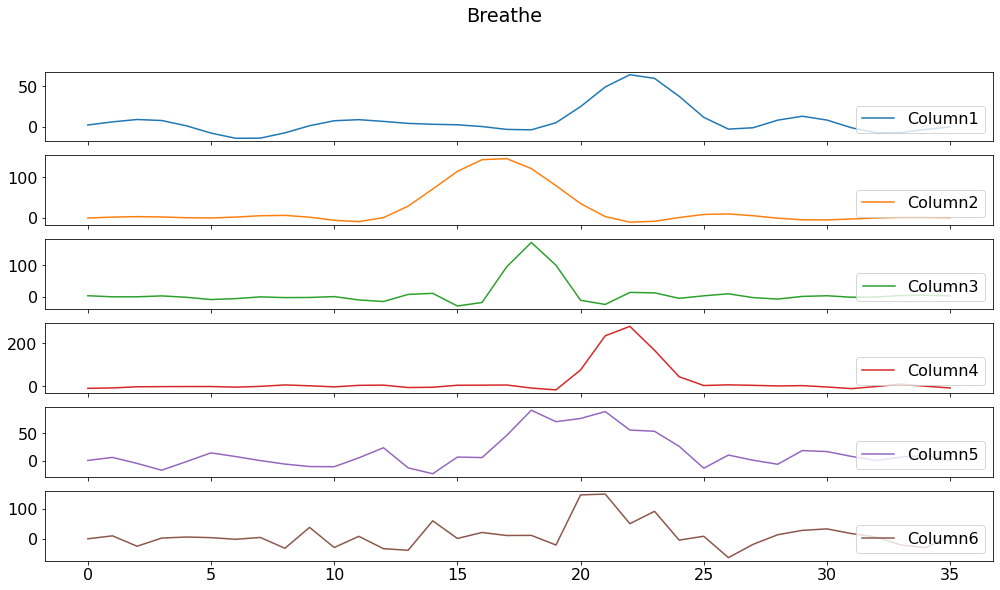

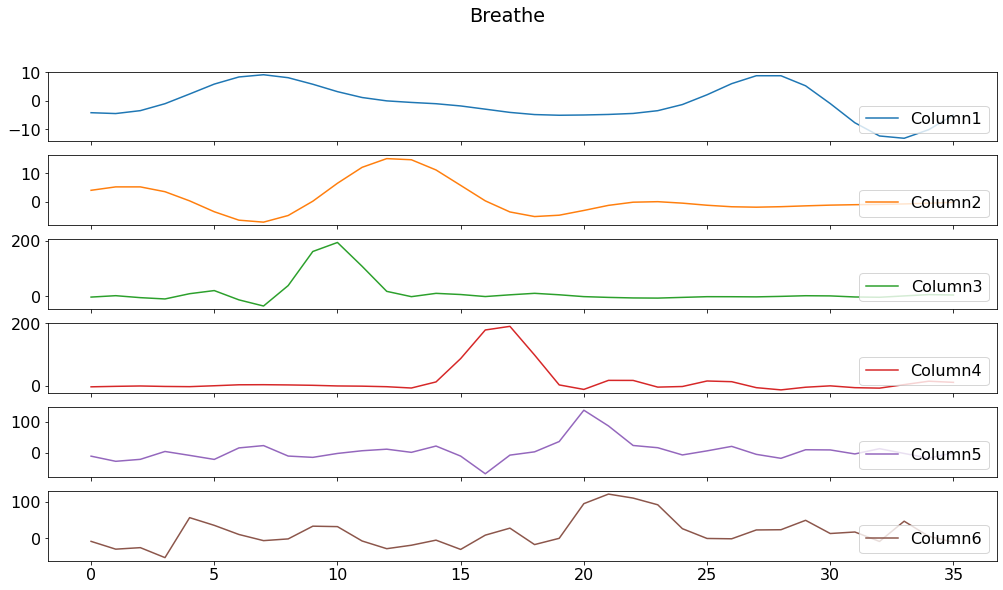

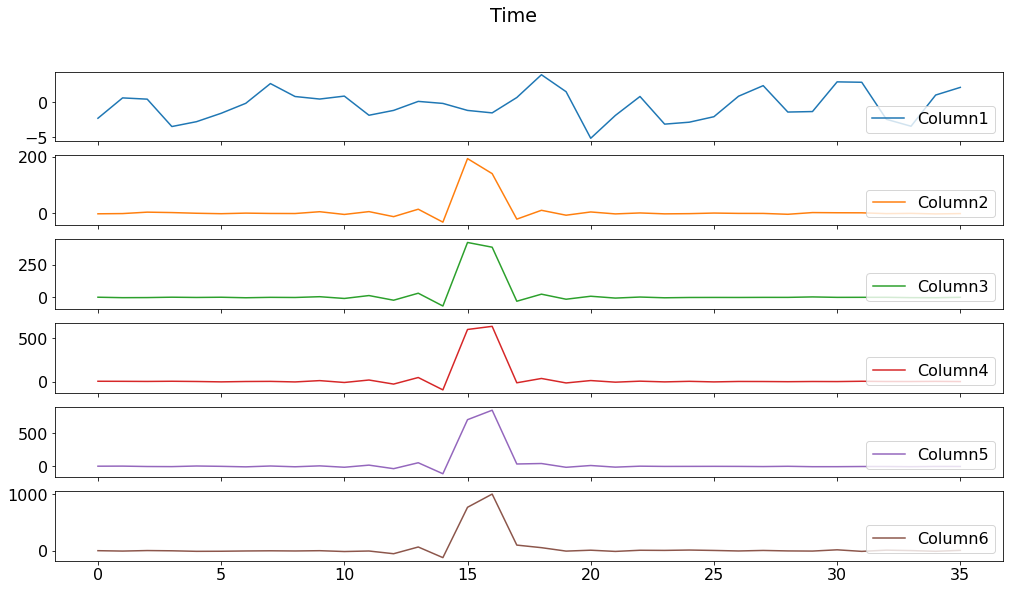

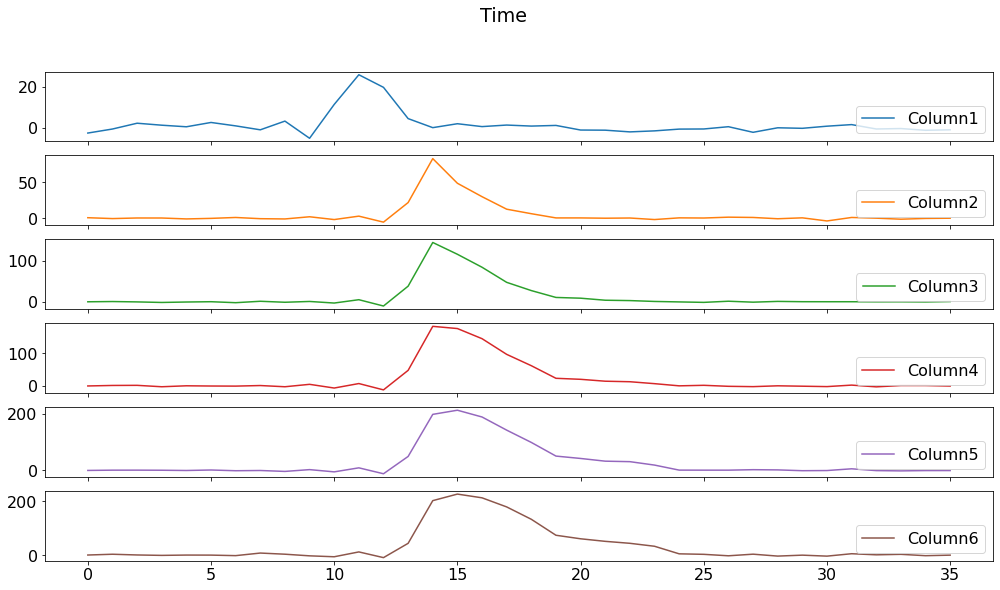

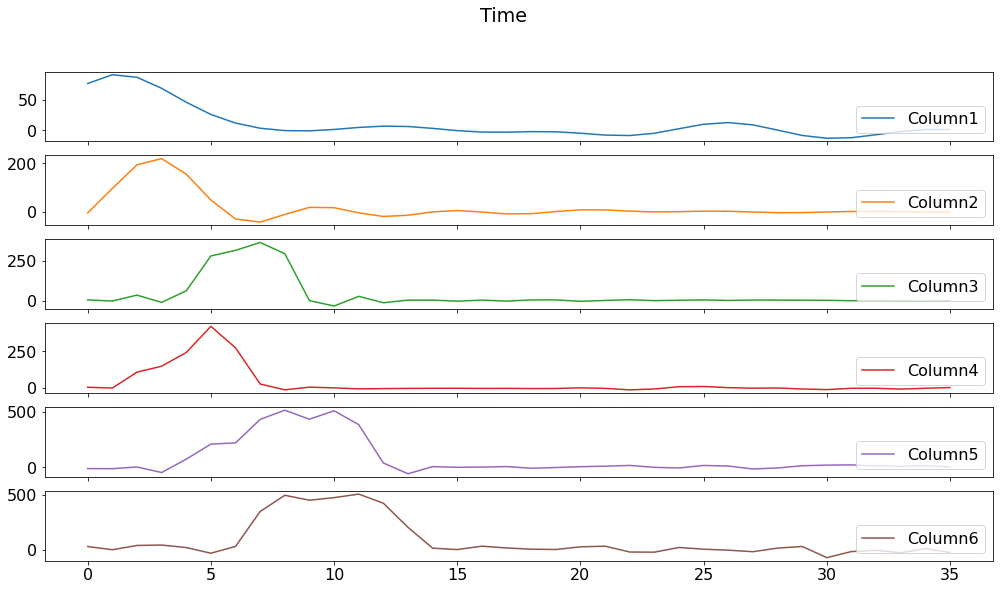

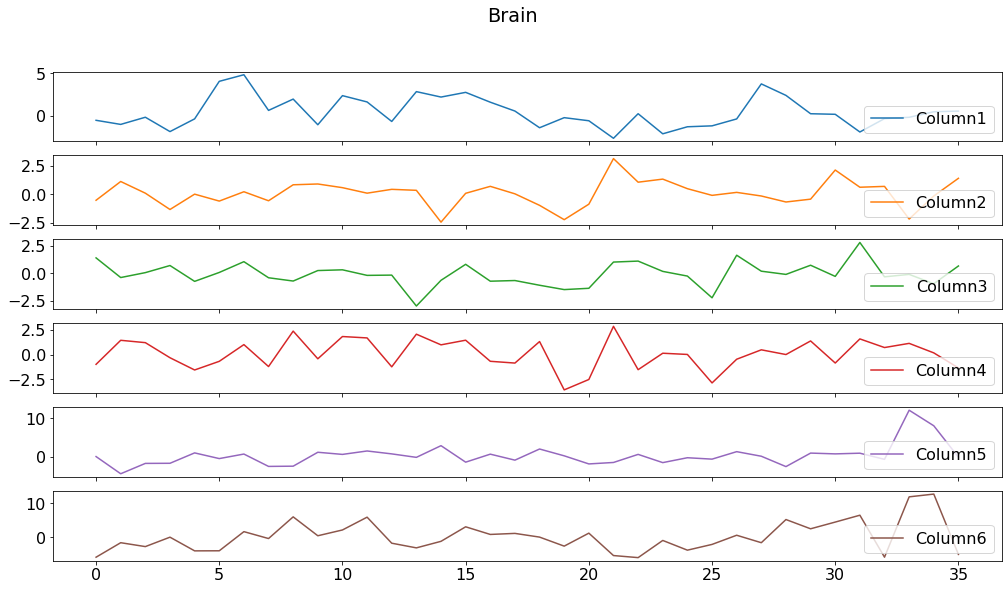

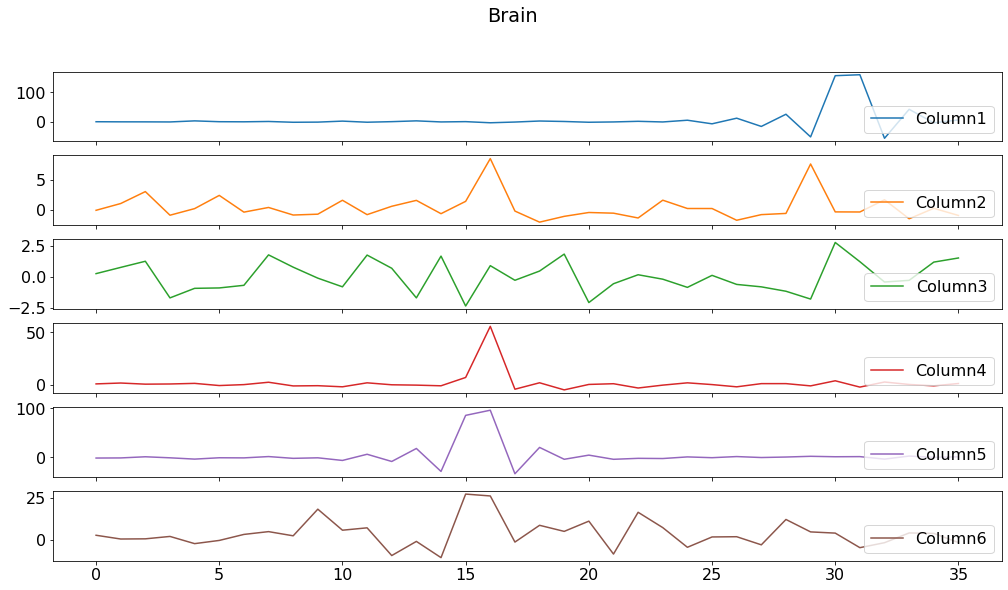

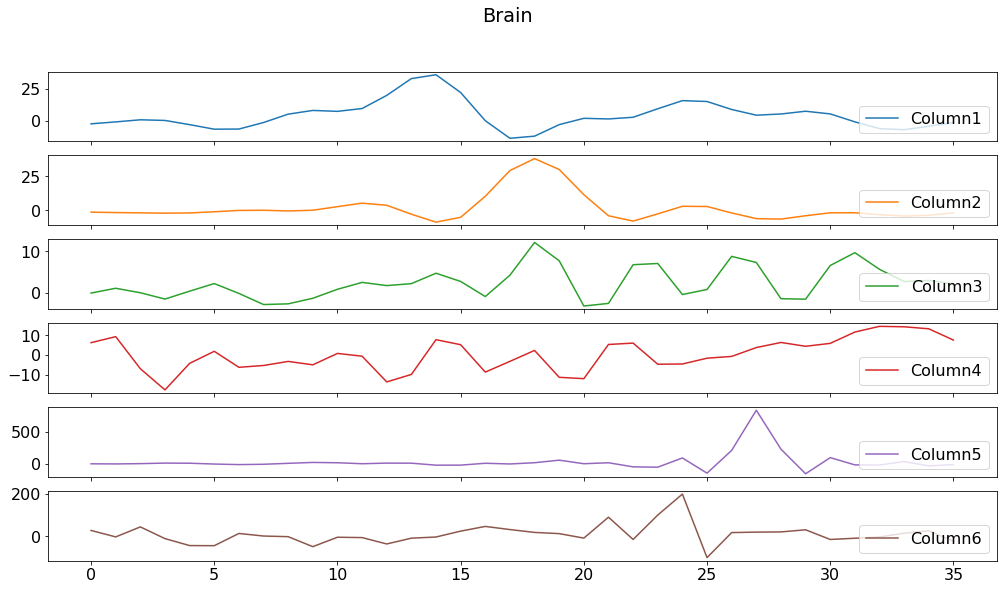

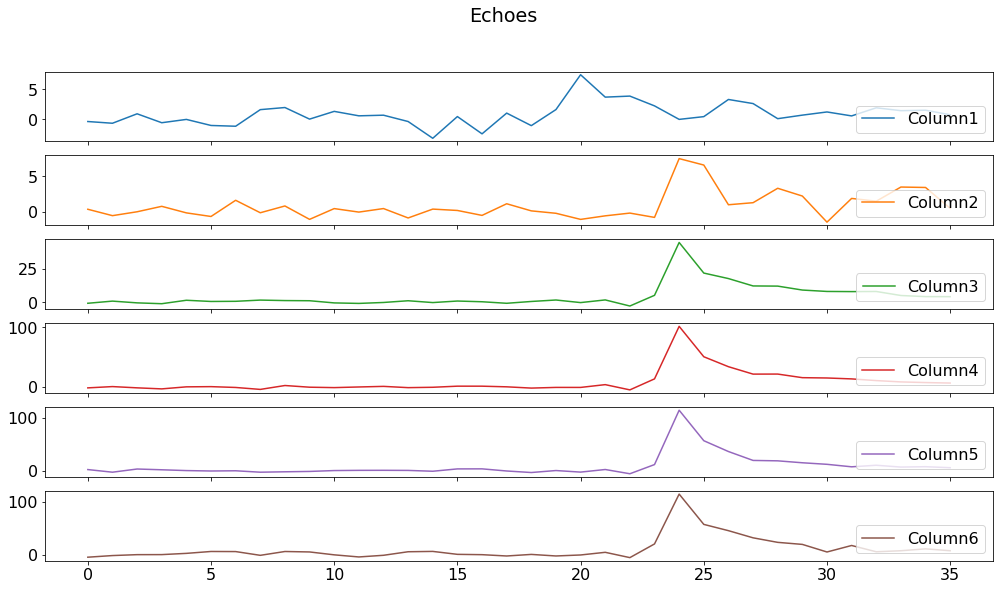

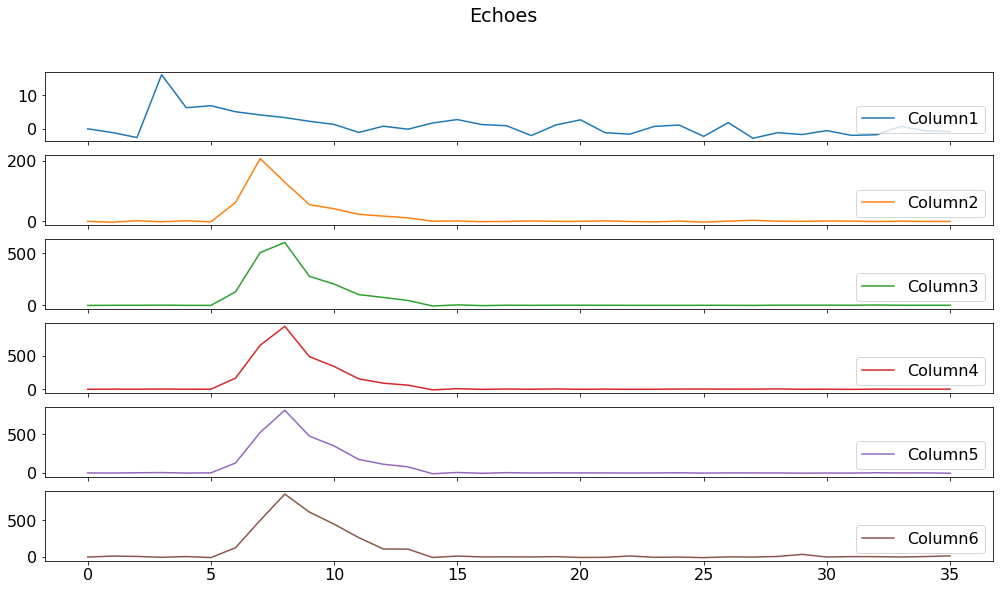

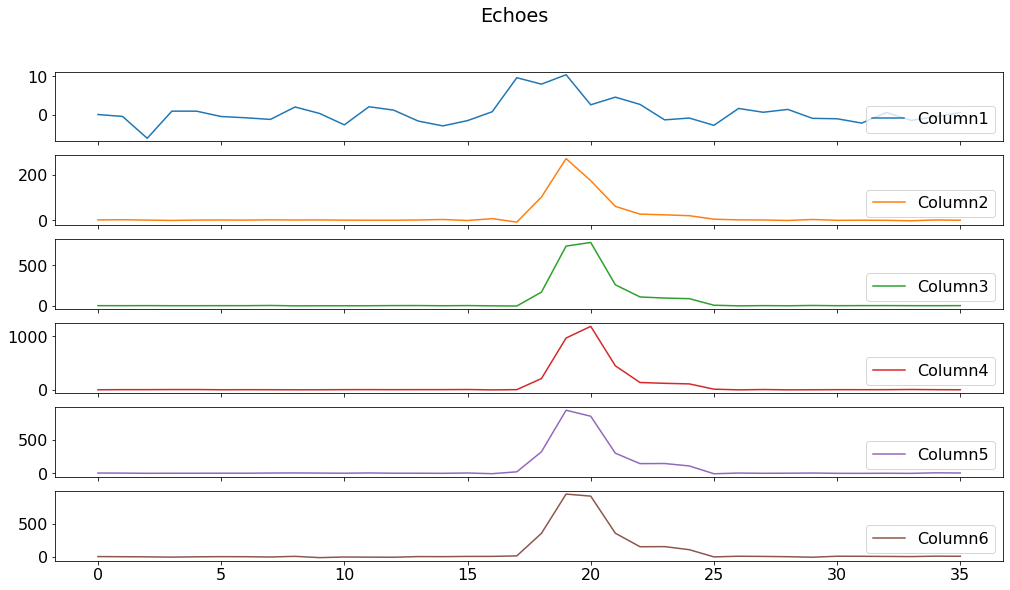

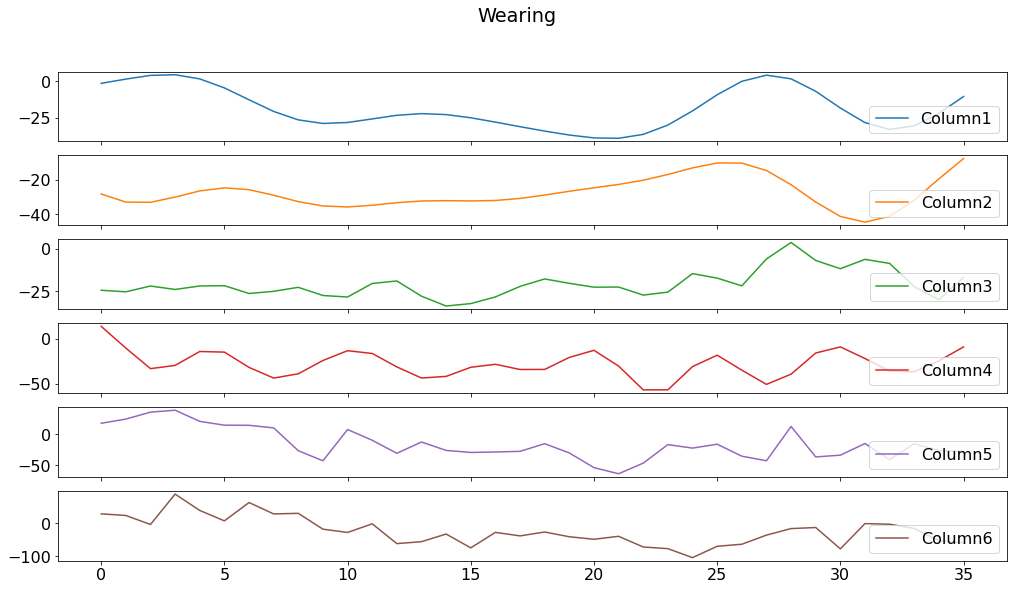

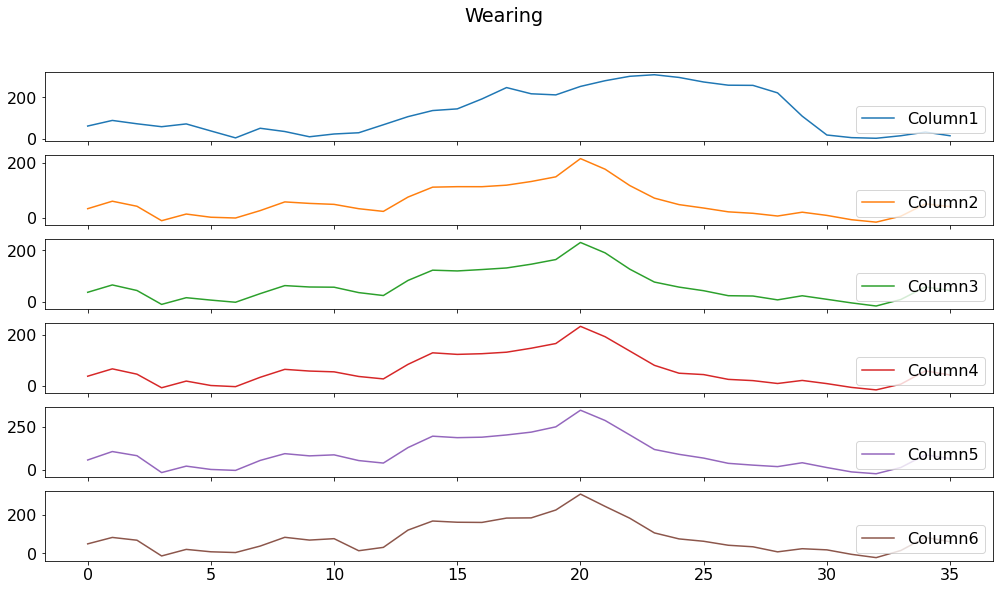

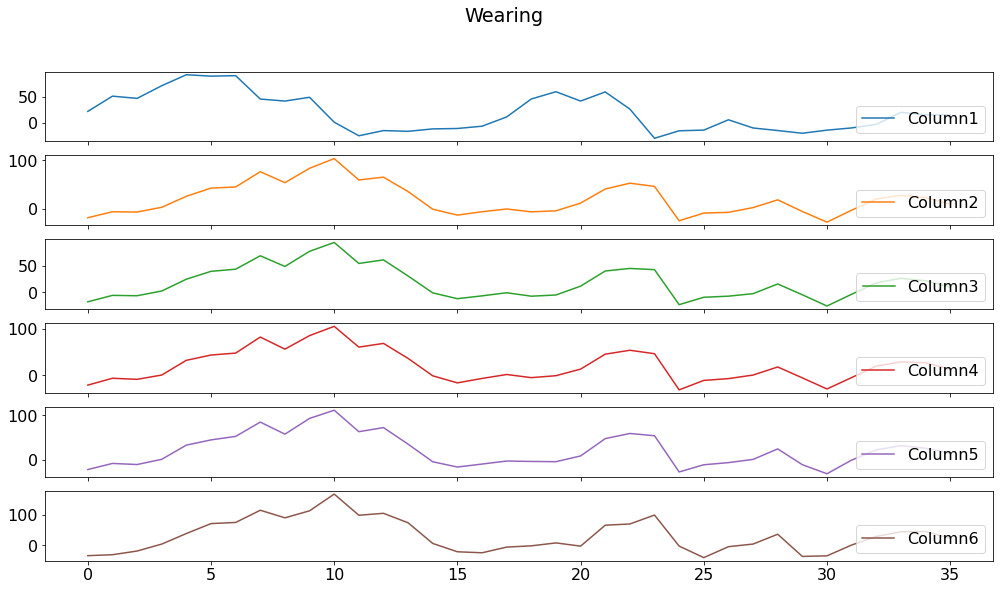

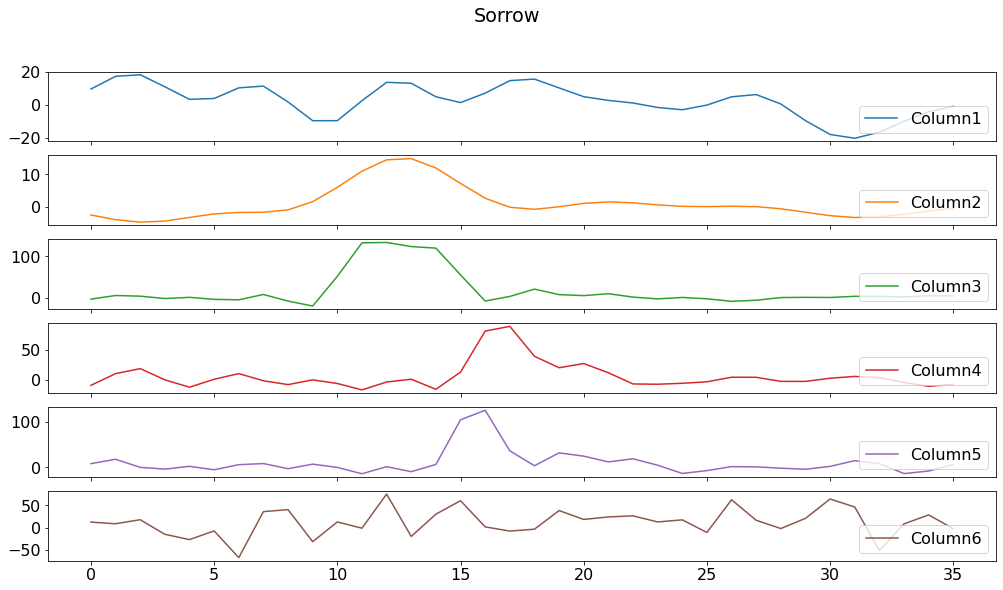

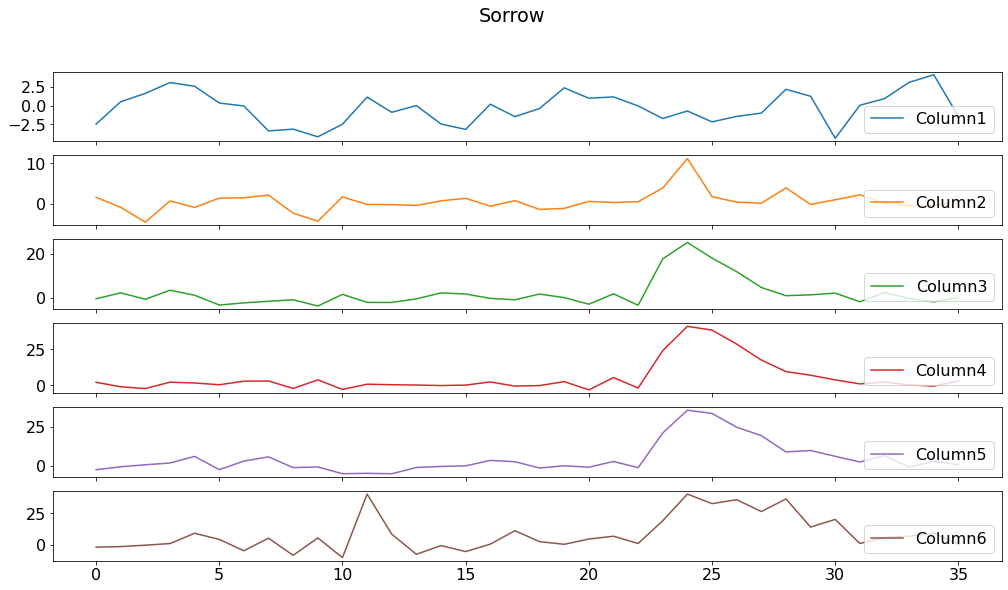

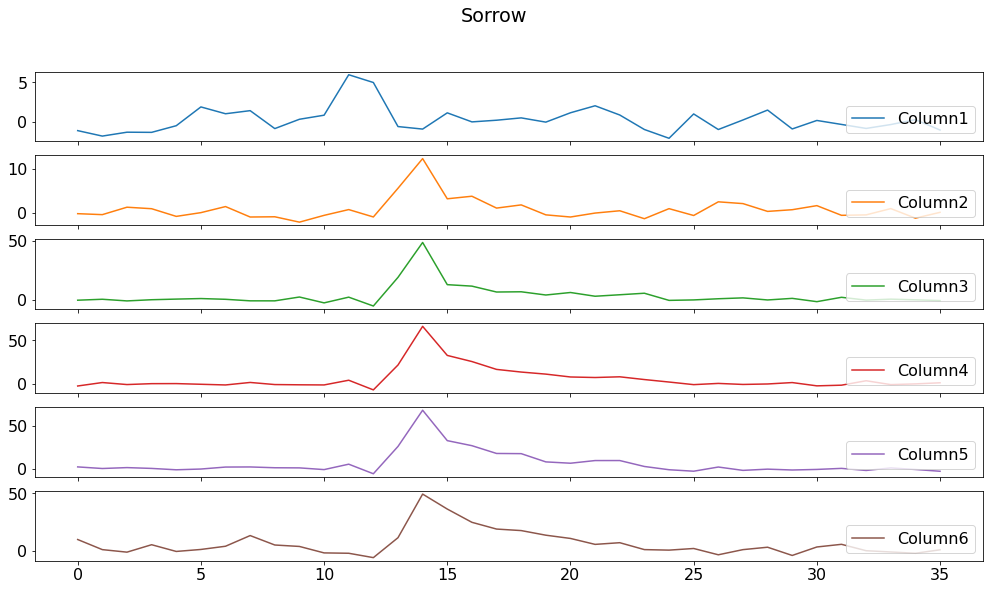

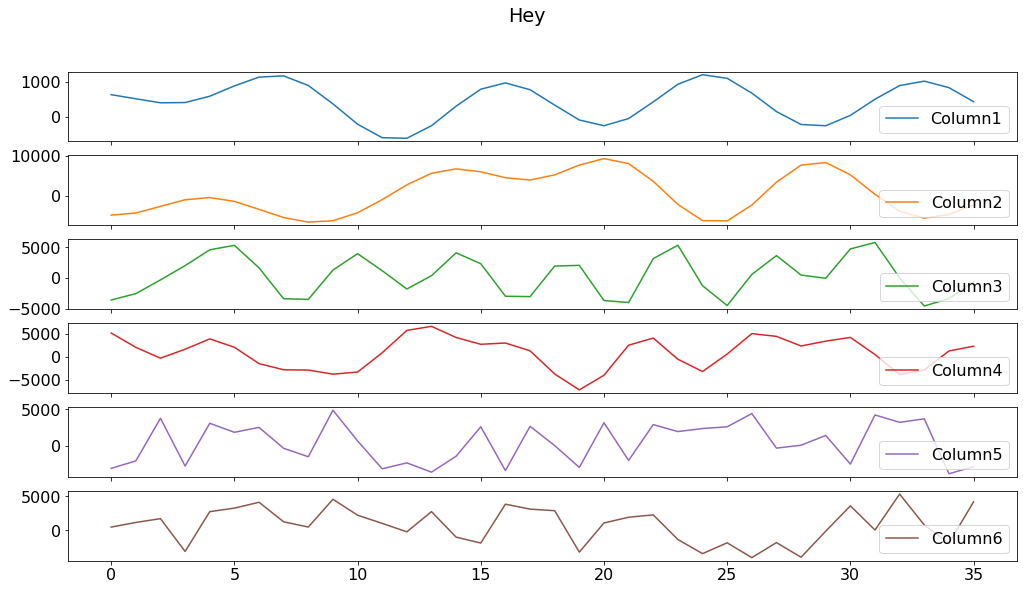

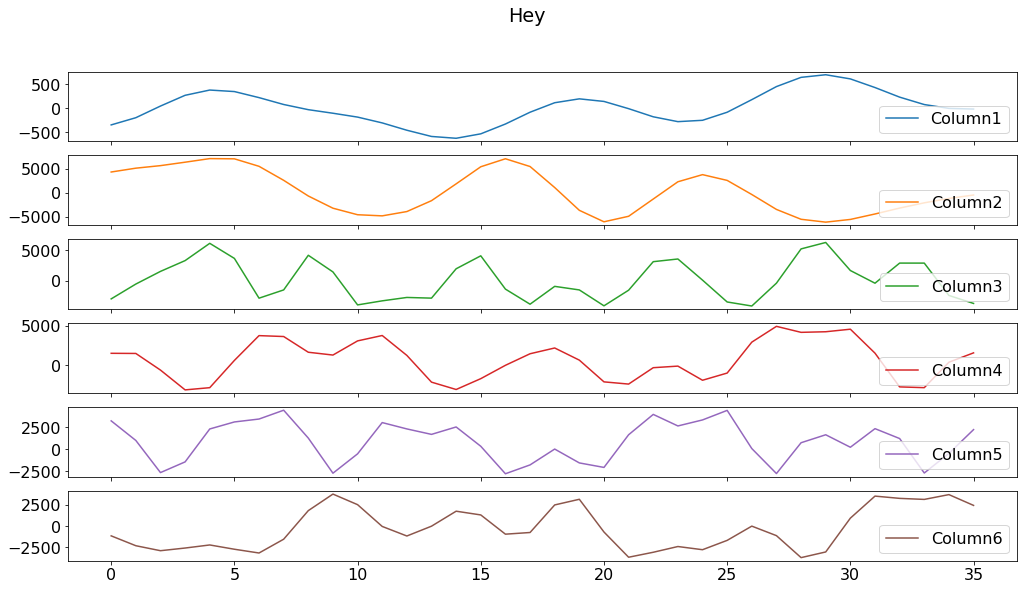

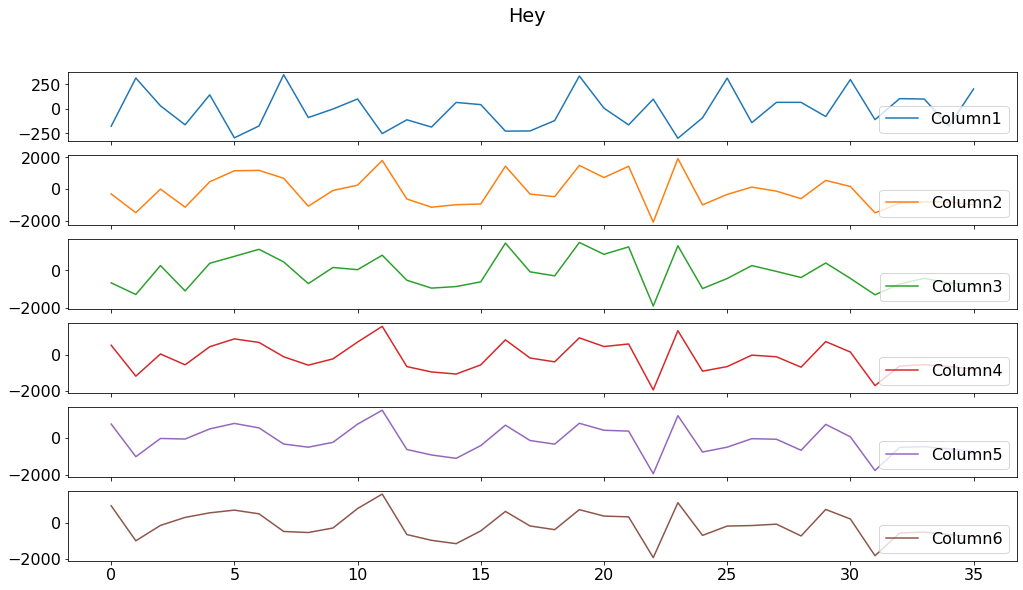

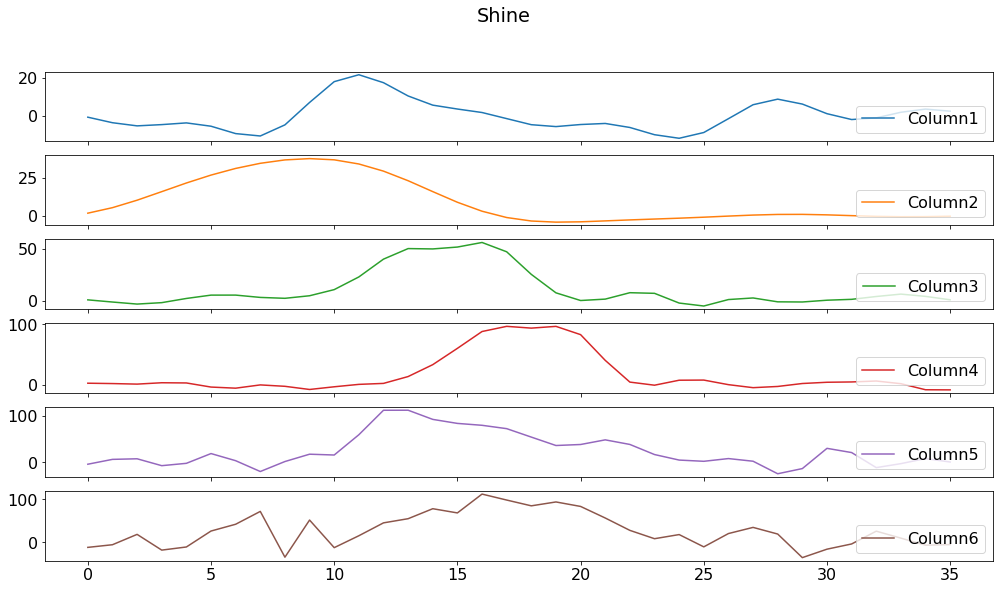

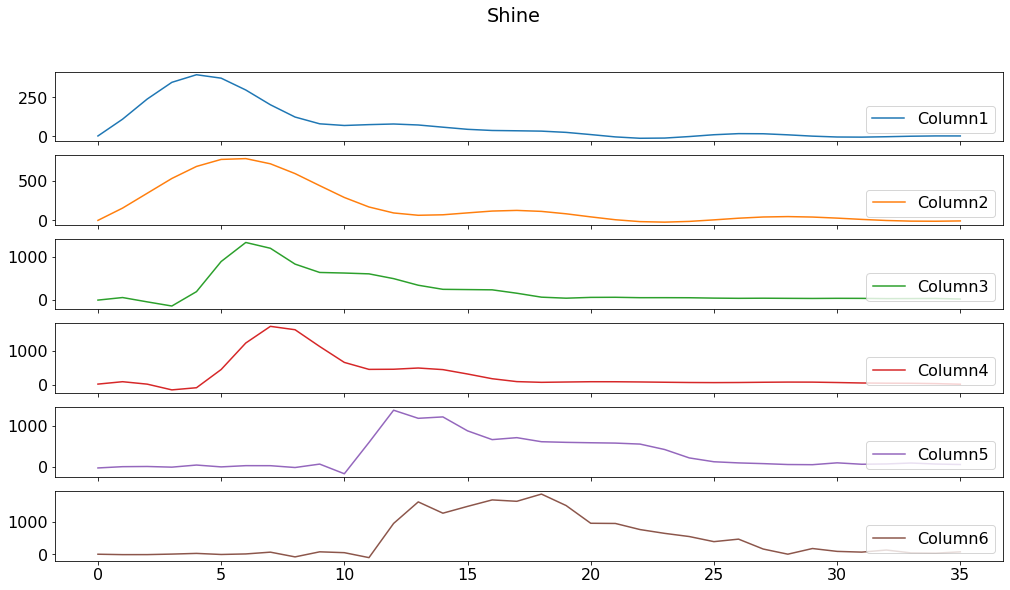

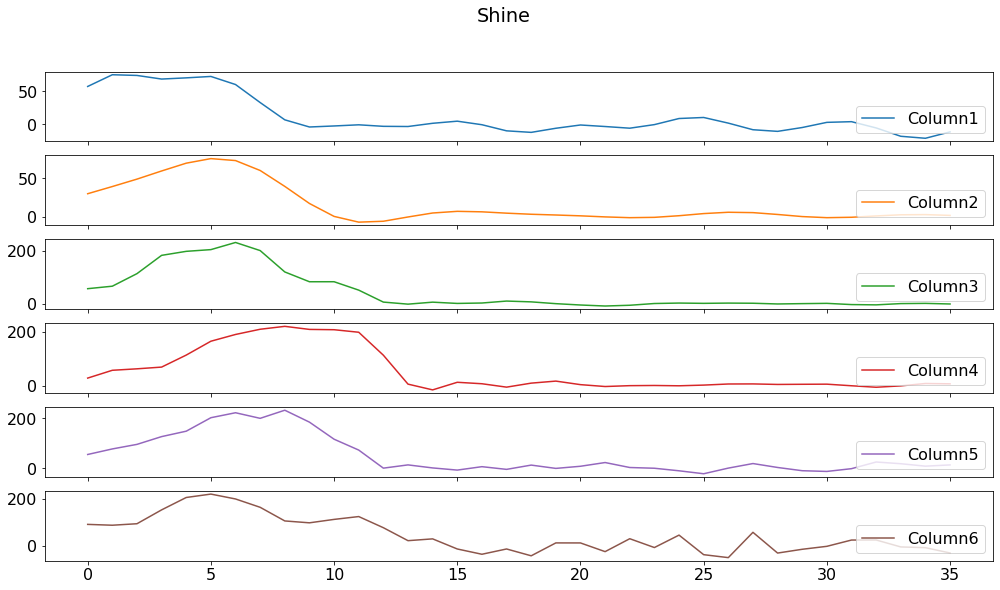

In [77]:
for label in label_mapping:
  for i in range(2):
    inspect_activity(reshaped_train[y_train_new==label][i],y_train_new[y_train_new==label][i])
  for i in range(2):
    

In [ ]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape

In [ ]:
X_train_reshaped = X_train.reshape((X_train_shape[0] * X_train_shape[1],X_train_shape[2]))
X_test_reshaped = X_test.reshape((X_test_shape[0] * X_test_shape[1],X_test_shape[2]))

In [ ]:
X_train_reshaped[X_train_reshaped[:,0] >1000,0].shape

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
axis = axis.flatten()
for i in range(6):
  axis[i].plot(X_train_reshaped[:,i])
  axis[i].set_title(label_mapping.get(i))

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15))
axis = axis.flatten()
for i in range(6):
  axis[i].plot(np.sort(X_train_reshaped[:,i]))
  axis[i].set_title(label_mapping.get(i))